In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from model.classifier import KNN
from util.datasets import train_test_split, vertebral_column
from util.plotlib import *
from util.metrics import *
from sklearn.utils import shuffle

In [3]:
samples, targets = vertebral_column(path='../../data/column_2C.dat')
attr = [0, 1]
samples = normalize(samples[:, attr])

In [4]:
realizations = 20
ks_2b_tested = [3, 6, 9, 15, 19]
save_state_hitrate_k = []
save_state_cfs_matrix_k = []
save_state_samples_k = []
save_state_targets_k = []
save_state_predicted_k = []

In [5]:
for r in range(realizations):
    save_temp_samples = []
    save_temp_targets = []
    save_temp_predicted = []
    save_temp_hitrate = []
    save_temp_cfs_matrix = []
    for i, k in enumerate(ks_2b_tested):
        _hitrate = 0
        _cfs_matrix = []

        samples, targets = shuffle(samples, targets)

        x_train, x_test, y_train, y_test = train_test_split(samples, targets, .75)
        clf = KNN(k=k, samples=x_train, targets=y_train)

        predicted = clf.predict(x_test)
        _hitrate = hitrate(y_test, predicted)
        _cfs_matrix = confusion_matrix(y_test, predicted, len(np.unique(targets)))

        # saving temporary data
        save_temp_samples.append(samples)
        save_temp_targets.append(targets)
        save_temp_predicted.append(predicted)
        save_temp_hitrate.append(_hitrate)
        save_temp_cfs_matrix.append(_cfs_matrix)


    # saving definitive data
    save_state_samples_k.append(save_temp_samples)
    save_state_targets_k.append(save_temp_targets)
    save_state_predicted_k.append(save_temp_predicted)
    save_state_hitrate_k.append(save_temp_hitrate)
    save_state_cfs_matrix_k.append(save_temp_cfs_matrix)

In [6]:
# visualizing hitrates
save_state_hitrate_k = np.asarray(save_state_hitrate_k)
save_state_hitrate_k

array([[0.5       , 0.65384615, 0.66666667, 0.65384615, 0.62820513],
       [0.6025641 , 0.6025641 , 0.76923077, 0.65384615, 0.67948718],
       [0.67948718, 0.61538462, 0.67948718, 0.61538462, 0.69230769],
       [0.64102564, 0.67948718, 0.69230769, 0.6025641 , 0.65384615],
       [0.65384615, 0.65384615, 0.78205128, 0.62820513, 0.62820513],
       [0.66666667, 0.55128205, 0.57692308, 0.69230769, 0.61538462],
       [0.65384615, 0.62820513, 0.61538462, 0.64102564, 0.71794872],
       [0.6025641 , 0.62820513, 0.61538462, 0.65384615, 0.61538462],
       [0.62820513, 0.57692308, 0.65384615, 0.64102564, 0.66666667],
       [0.67948718, 0.6025641 , 0.66666667, 0.64102564, 0.64102564],
       [0.62820513, 0.67948718, 0.65384615, 0.64102564, 0.64102564],
       [0.62820513, 0.56410256, 0.64102564, 0.58974359, 0.65384615],
       [0.62820513, 0.53846154, 0.62820513, 0.64102564, 0.62820513],
       [0.67948718, 0.6025641 , 0.73076923, 0.65384615, 0.64102564],
       [0.56410256, 0.67948718, 0.

In [7]:
# better and worst hitrate indexes
argsminmax(save_state_hitrate_k, np.argmax)

array([19, 18,  4, 17,  6], dtype=int64)

In [8]:
argsminmax(save_state_hitrate_k, np.argmin)

array([ 0, 12,  5, 11, 18], dtype=int64)

In [9]:
# accuracy and std by k-value
acc = np.asarray(accuracy(save_state_hitrate_k)).reshape(len(ks_2b_tested), 1)
argmax, argmin = argsminmax(acc, np.argmax), argsminmax(acc, np.argmin)

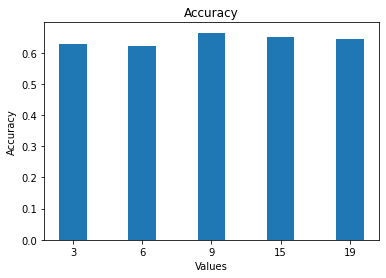

In [10]:
plot_bar_acc(accuracy(save_state_hitrate_k), ks_2b_tested)

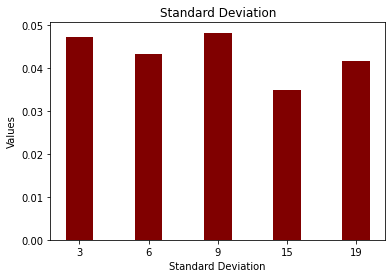

In [11]:
std = standard_deviation(save_state_hitrate_k)
plot_bar_std(std, ks_2b_tested)

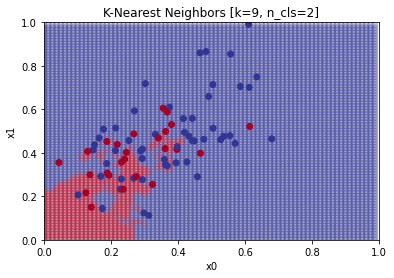

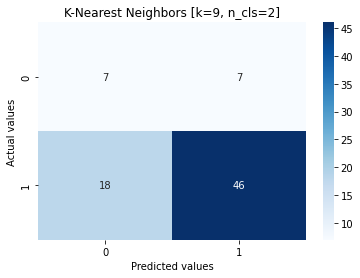

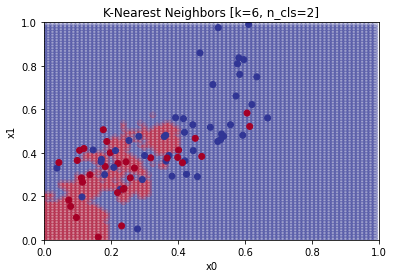

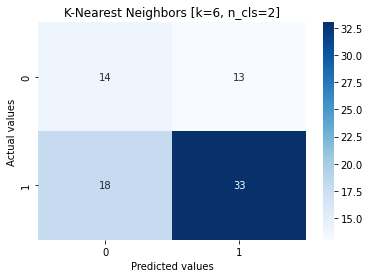

In [12]:
for i in (argmax, argmin):
    tsamples = save_state_samples_k[i][i]
    ttargets = save_state_targets_k[i][i]
    tk = ks_2b_tested[i]

    x_train, x_test, y_train, y_test = train_test_split(tsamples, ttargets, .75)
    clf = KNN(tk, x_train, y_train)
    plot_decision_boundary(clf, x_test, y_test)
    plot_confusion_matrix(clf, x_test, y_test)